In [26]:
# 기본 패키지
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer    # load_  함수
# from sklearn import datasets

# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

# 분류모델구축
from sklearn.tree import DecisionTreeClassifier      # 결정트리
from sklearn.neighbors import KNeighborsClassifier   # K-최근접 이웃
from sklearn.linear_model import LogisticRegression  # 로지스틱회귀

# 앙상블 모델 구축
from sklearn.ensemble import VotingClassifier        # 과반수투표로 모델링시킴,,

# 모델 검정
from sklearn.metrics import confusion_matrix, classification_report  # 혼동행렬, 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도,정밀도,재현도,f1,,,
from sklearn.metrics import roc_curve, auc            # ROC 곡선그리기

# 최적화
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV      # 하이퍼 파라미터 튜닝
from sklearn.model_selection import cross_val_score   # 교차타당도

In [1]:
# 기본 패키지
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

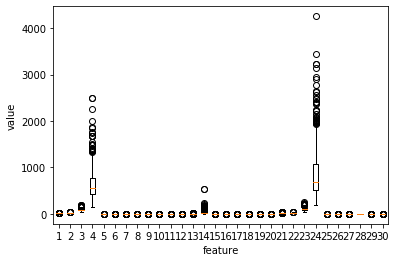

In [7]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [8]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [9]:
np.unique(cancer.target)

array([0, 1])

In [10]:
# 0은 음성, 1은 양성 클래스
np.unique(cancer.target, return_counts=True)  # return_counts : 각각 개수 알려줌

(array([0, 1]), array([212, 357], dtype=int64))

In [11]:
x = cancer.data
y = cancer.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(455, 30)

In [14]:
x_test.shape

(114, 30)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72], dtype=int64))

In [17]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    # 정방향 계산 : 선형함수(직선방정식을 이용해서 계산)
    def forpass(self, x):         
        z = np.sum(x * self.w) + self.b    # sum = sigma
        return z
    
    # 역방향 계산 : 오차제곱(SE)  >>  경사하강법
    def backprob(self, x, err):
        w_gred = x * err   # 가중치에 대한 경사 계산
        b_gred = 1 * err   # 절편에 대한 경사 계산
        return w_gred, b_gred
    
    # 활성화 함수   z = (-inf ~ +inf) >>  a = (0, 1)
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))   # 시그모이드 계산
        return a
    
    # 훈련을 시키는 메서드
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])   # 가중치를 모든 샘플에 1로 초기화
        self.b = 0                     # 절편 초기화
        
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                
                z = self.forpass(x_i)  # 정방향 계산
                a = self.activation(z) # 활성화함수 적용
                err = -(y_i - a)       # 오차 계산
                
                w_gred, b_gred = self.backprob(x_i, err)  # 역방향 계산
                
                self.w -= w_gred   # 가중치 업데이트
                self.b -= b_gred   # 절편 업데이트
                
                # 모든 샘플에는 똑같은 가중치(w)를 가져야 한다
                # 나중에는 특성에 맞게 가중치를 준다....
    
    # 예측하는 메서드
    def predict(self, x):
        # 선형함수 적용, 리스트 내포 문법
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용   
        a = self.activation(np.array(z))
        # 계단 함수 적용
        return a > 0.5              # 0.5(임계값)보다 크면 참(1), 아니면 거짓(0) 반환 

In [18]:
# 로지스틱 회귀 모델 훈련시키는 작업
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


In [19]:
# 모델의 정확도 /모델평가
np.mean(neuron.predict(x_test) == y_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


0.8245614035087719

### 손실함수의 결괏값 조정해 저장하는 기능 추가하기
- __init__() 메서드에 손실함수 결괏값을 저장할 리스트 self.losses 생성
- 샘플마다 손실함수를 계산하고 그 결괏값을 모두 더한 다음 샘플 개수로 나눈 평균값 self.losses 변수에 저장
- self.activation() 메서드로 계산한 a는 np.log()의 계산을 위해 한 번 더 조정
- a가 0에 가까워지면 np.log() 함수의 값은 음의 무한대가 되고, a가 1에 가까워지면 np.log() 함수의 값은 0이 되기 때문이다
- 손실값이 무한해지면 정확한 계산이 불가능하다
- a의 값이 1*10^-10 ~ 1-1*10^-10 사이가 되도록 np.clip() 함수로 조정해야 한다.
- np.clip() 함수는 주어진 범위 밖의 값을 범위 양 끝의 값으로 잘라낸다.

In [20]:
class SingleLayer:          # 단일층
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []    # 손실값을 저장하는 객체
        
    def forpass(self, x):         
        z = np.sum(x * self.w) + self.b
        return z

    def backprob(self, x, err):
        w_gred = x * err
        b_gred = 1 * err
        return w_gred, b_gred
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0                  
        
        for _ in range(epochs):
            
            loss = 0
            # 모든 샘플에 대한 반복 작업을 위해서 인덱스를 섞는 작업
            indexes = np.random.permutation(np.arange(len(x)))

            for i in indexes:
            #for x_i, y_i in zip(x, y):
                
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)      
                
                w_gred, b_gred = self.backprob(x[i], err) 
                
                self.w -= w_gred   
                self.b -= b_gred
                
                # 안전한 로그함수의 계산을 위해서 클리핑한 후 손실을 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                # 에포크마다 손실을 저장
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        
            self.losses.append(loss/len(y))
                    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]   
        a = self.activation(np.array(z))
        return a > 0.5 
    
    # 평가함수
    def score(self, x, y):
        return np.mean(self.predict(x)==y)

In [21]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


0.9385964912280702

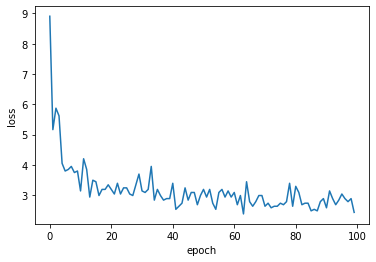

In [22]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42) 
# 손실함수-로그
# max_iter : 에포크,반복횟수지정
# tol : 지정한 값만큼 감소되지않으면 반복을 중단
# random_state : 유사난수 초기값
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [24]:
sgd.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [25]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', max_iter=100, tol=1e-3, random_state=42)
# 손실함수-힌지
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9385964912280702